<a href="https://colab.research.google.com/github/rsmecking/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Ryan_Mecking_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

Mean: (3505+ 2400+ 3027+ 2798+ 3700+ 3250+ 2689)/7=3052.71 

Variance: $(3505^2+ 2400^2+ 3027^2+ 2798^2+ 3700^2+ 3250^2+ 2689^2) /6=214387.9   $

STD: $\sqrt214387.9 =  463.02$

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [16]:
import pandas as pd
import numpy as np
last_week_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
last_week_customers = [127, 80, 105, 92, 120, 115, 93]

last_week = {"last_week_sales": last_week_sales, "last_week_customers": last_week_customers,}

df = pd.DataFrame(last_week)

df.cov()

,last_week_sales,last_week_customers
last_week_sales,214387.904762,7604.357143
last_week_customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

Variance: $(127^2+ 80^2+ 105^2+ 92^2+ 120^2+ 115^2+ 93^2) /6=290.95  $

STD: $\sqrt249.38 =  17.05$

In [2]:
cust_var = np.array(last_week_customers)
sales_var = np.array(last_week_sales)

sales_std = sales_var.std(ddof=1)
customer_std = cust_var.std(ddof=1) 

print (sales_var.var(ddof=1))
print (sales_std)
print (cust_var.var(ddof=1))
customer_std

214387.90476190473
463.0204150595357
290.95238095238096


17.057326313123664

In [0]:
sales_std_customers_std = (sales_std*customer_std)

In [10]:
# print (df.corr())
df['last_week_sales'].cov(df['last_week_customers'])/sales_std_customers_std

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [11]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titanic = titanic.drop(columns = ['Unnamed: 0', 'name', 'sex', 'cabin', 'embarked', 'home.dest' ])
titanic.head()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,2,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,11,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,NaN,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,NaN,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,NaN,NaN,1


In [12]:
print (titanic.cov())
titanic.corr()
# No ticket?

                     pclass  survived  ...         body  has_cabin_number
pclass             0.701969 -0.127248  ...    -2.876653         -0.249992
survived          -0.127248  0.236250  ...     0.000000          0.061406
age               -3.954605 -0.314343  ...    81.622922          1.463138
sibsp              0.053090 -0.014088  ...    -8.708471         -0.003946
parch              0.013287  0.034776  ...     4.237190          0.013316
fare             -24.227788  6.146023  ...  -179.164684         10.976961
body              -2.876653  0.000000  ...  9544.688567          3.625689
has_cabin_number  -0.249992  0.061406  ...     3.625689          0.174613

[8 rows x 8 columns]


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

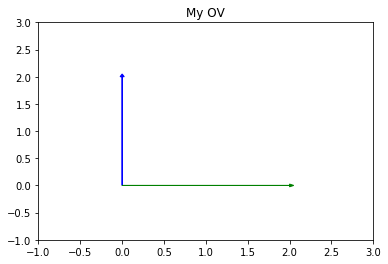

In [18]:
import matplotlib.pyplot as plt
v_1 = [0,2]
v_2 = [2,0]

plt.arrow(0,0, v_1[0], v_1[1], head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v_2[0], v_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("My OV")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [14]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a,b)
#No because they don't equate to zero.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [13]:
from numpy import linalg
c = [2, -15, 6, 20]

linalg.norm(c)**2

665.0

In [19]:
np.dot(c,c)

665

In [20]:
c_t= np.transpose(c)
np.dot(c_t,c)
#They are all the same.

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

=\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

=\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1\\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0\\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [23]:
f = [4, 12, 11, 9, 2]
f = np.asarray(f)
f/np.linalg.norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

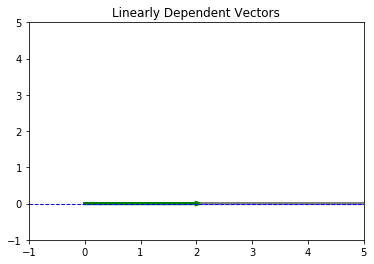

In [30]:
plt.xlim(-1,5)          
plt.ylim(-1,5)
v = [2,0]

v2 = np.multiply(3, v)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.title("Linearly Dependent Vectors")
plt.show()

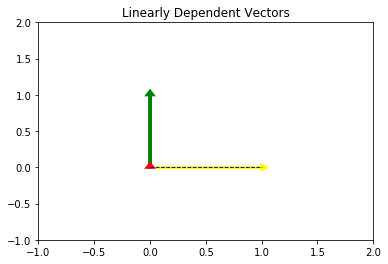

In [27]:
i_hat= [1,0,0]
j_hat= [0,1,0]
k_hat= [0,0,1]

plt.xlim(-1,2)          
plt.ylim(-1,2)


plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, k_hat[1], k_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [36]:
g = [1,2]
h = [4,8]

g_h = pd.DataFrame({"G": g, "H": h,}) 
g_h.corr()
#Dependent vectors; they span 1 dementional space

,G,H
G,1.0,1.0
H,1.0,1.0


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [37]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

l_m_n = pd.DataFrame({"L": l, "M": m, "N": n})
l_m_n.corr()
#Independent vectors; they span three dementional space.

,L,M,N
L,1.000000,0.917663,-0.327327
M,0.917663,1.000000,-0.675845
N,-0.327327,-0.675845,1.000000


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



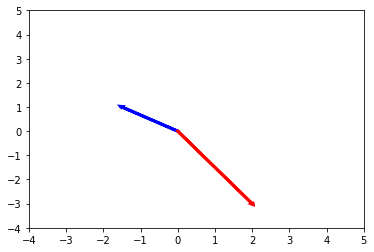

In [38]:
a = [-1.5,1] 
b = [2,-3]


plt.xlim(-4,5)          
plt.ylim(-4,5)

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.show()

## 6.2 What does it mean to form a basis?

A basis needs to be linearly independant and span the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()